In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Basic simulation

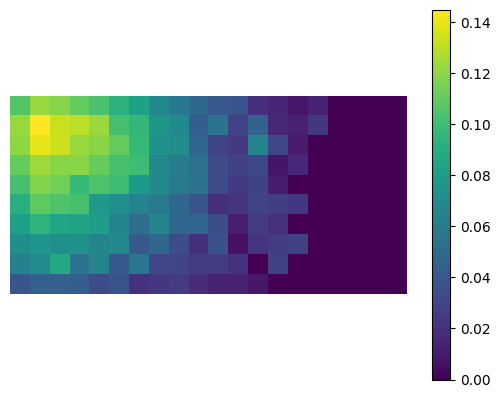

In [124]:
x_dim = 10
y_dim = 20
dimensions = (x_dim, y_dim)
population_size = 1_000_000

total_ibd_proportion = 0.1
ibd_count = int(np.floor(total_ibd_proportion*population_size))
no_ibd_count = int(np.ceil((1-total_ibd_proportion)*population_size))

ibd = np.concatenate((np.full(ibd_count, 1), np.full(no_ibd_count, 0)), axis=0)
x_coord = np.concatenate((np.clip(np.random.normal(0, 4, ibd_count), a_min=0, a_max=x_dim-0.01), np.clip(np.random.normal(0, 5, no_ibd_count), a_min=0, a_max=x_dim-0.01)), axis=0)
y_coord = np.concatenate((np.clip(np.random.normal(0, 4, ibd_count), a_min=0, a_max=y_dim-0.01), np.clip(np.random.normal(0, 5, no_ibd_count), a_min=0, a_max=y_dim-0.01)), axis=0)

x_bin = np.floor(x_coord)
y_bin = np.floor(y_coord)

data = np.full((x_dim, y_dim, 2), 0)
for i in range(population_size):
    data [int(x_bin[i])] [int(y_bin[i])] [0] += ibd[i]
    data [int(x_bin[i])] [int(y_bin[i])] [1] += 1

proportions = np.full((x_dim, y_dim), np.nan)
for i, j in product(range(x_dim), range(y_dim)):
    if data[i][j][0] == 0:
        proportions[i][j] = 0
    else:
        proportions[i][j] = data[i][j][0] / data[i][j][1]

plt.imshow(proportions)
plt.axis('off')
plt.colorbar()
plt.savefig("raw_plot")

# Thresholding algorithm

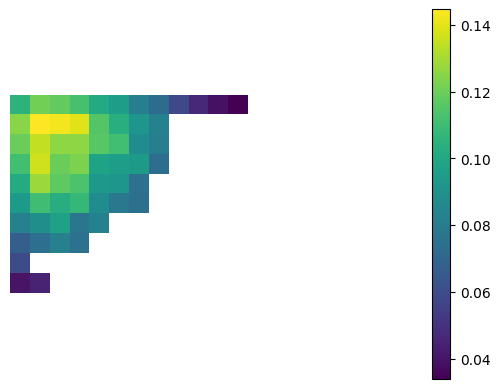

In [123]:
def thresh_mechanism(proportions, threshold):
    (x_dim, y_dim) = np.shape(proportions)
    for i, j in product(range(x_dim), range(y_dim)):
        if data[i][j][0] < threshold:
            proportions[i][j] = np.nan
    return proportions

plt.imshow(thresh_mechanism(np.copy(proportions), 100))
plt.axis('off')
plt.colorbar()
plt.savefig("thresholding_plot")

# Laplace emechanism

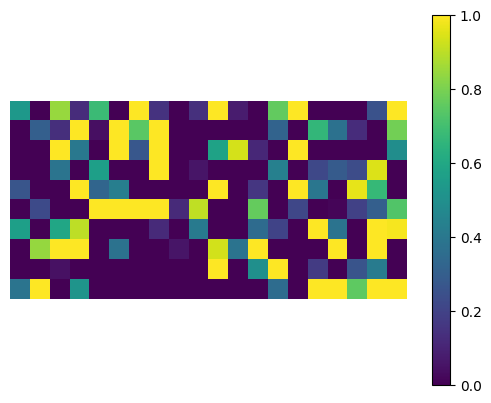

In [122]:
def laplace_mechanism(proportions, epsilon, sensitivity):
    (x_dim, y_dim) = np.shape(proportions)
    noise = np.random.laplace(0, sensitivity/epsilon, dimensions)
    proportions += noise
    proportions = np.clip(proportions, a_min=0, a_max=1)
    return proportions

plt.imshow(laplace_mechanism(np.copy(proportions), 1, 1))
plt.axis('off')
plt.colorbar()
plt.savefig("pure_laplace_plot")

# Laplace + noisy thresholding

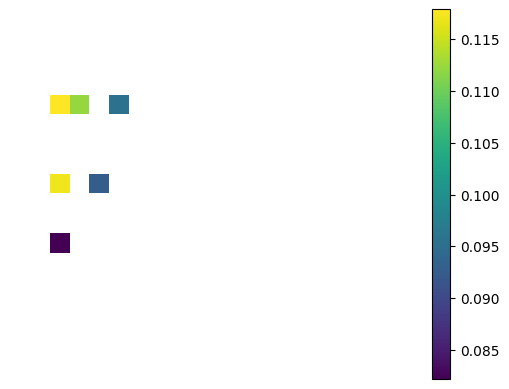

In [120]:
def noisy_thresh_mechanism(proportions, threshold, p):
    (x_dim, y_dim) = np.shape(proportions)
    for i, j in product(range(x_dim), range(y_dim)):
        if data[i][j][0] < threshold:
            proportions[i][j] = np.nan
        else:
            if np.random.binomial(1, p) == 0:
                proportions[i][j] = np.nan
    return proportions

plt.imshow(noisy_thresh_mechanism(np.copy(proportions), 100, 0.1))
plt.axis('off')
plt.colorbar()
plt.savefig("noisy_thresholding_plot")

# Laplace + thesholding based on noised counts

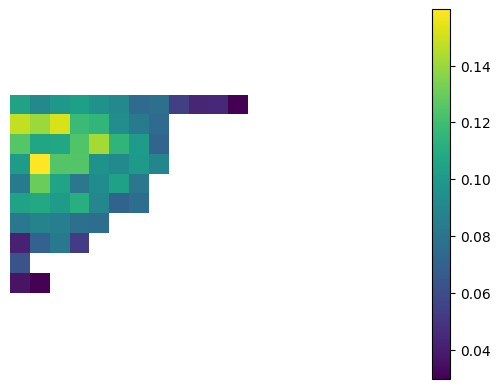

In [121]:
plt.imshow(laplace_mechanism(thresh_mechanism(np.copy(proportions), 100), 1, 0.01))
plt.axis('off')
plt.colorbar()
plt.savefig("thresholding_on_noised_counts_plot")